<a href="https://colab.research.google.com/github/TK-brsq/Research/blob/main/backward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=478b1541cedaac8f27356ff0c13f5b01f3bb6e1d4bfdb75d52ae9be7f0036c52
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchviz import make_dot

# Neuron

In [ ]:
class myReLU(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        print(f'myReLUのinput | {input}')
        ctx.save_for_backward(input)
        return torch.clamp(input, 0, 1)

    @staticmethod
    def backward(ctx, grad_output):
        print(f'myReLUのgrad_output | {grad_output}')
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[ input < 0] = 0
        return grad_input

class Neuron(nn.Module):
    def __init__(self):
        super(Neuron, self).__init__()
    def forward(self, x):
        return myReLU.apply(x)

# Model

In [ ]:
class Model(nn.Module):
    def __init__(self, indim, hiddim, outdim):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(indim, hiddim, bias=False)
        self.act1 = Neuron()
        self.fc2 = nn.Linear(hiddim, outdim, bias=False)
        self.act2 = Neuron()

    def forward(self, x):
        z1 = self.fc1(x)
        print(f'z1 | {z1}')
        a1 = self.act1(z1)
        print(f'a1 | {a1}')
        z2 = self.fc2(a1)
        print(f'z2 | {z2}')
        a2 = self.act2(z2)
        print(f'a2 | {a2}')
        return a2

# Train

Parameter containing:
tensor([[ 0.3179,  0.2404],
        [-0.5783,  0.2120],
        [ 0.6746, -0.1471],
        [-0.6846, -0.0759]], requires_grad=True)
Parameter containing:
tensor([[-0.1692,  0.1680,  0.2148, -0.3061],
        [-0.0289,  0.1947, -0.4692, -0.3550]], requires_grad=True)
z1 | tensor([ 0.1830, -0.2680,  0.3226, -0.3499], grad_fn=<SqueezeBackward4>)
myReLUのinput | tensor([ 0.1830, -0.2680,  0.3226, -0.3499], grad_fn=<SqueezeBackward4>)
a1 | tensor([0.1830, 0.0000, 0.3226, 0.0000], grad_fn=<myReLUBackward>)
z2 | tensor([ 0.0383, -0.1566], grad_fn=<SqueezeBackward4>)
myReLUのinput | tensor([ 0.0383, -0.1566], grad_fn=<SqueezeBackward4>)
a2 | tensor([0.0383, 0.0000], grad_fn=<myReLUBackward>)
0.4083290100097656


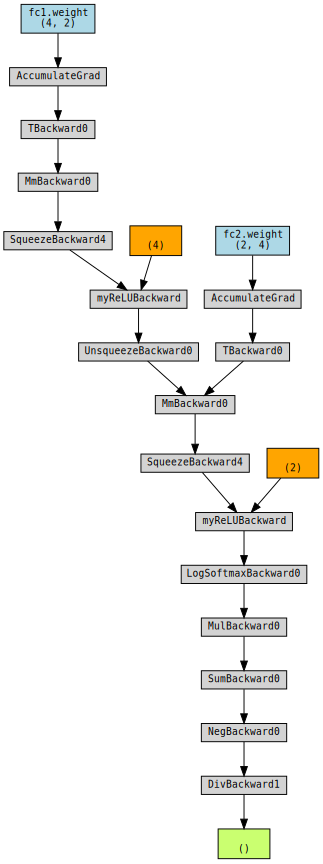

In [ ]:
model = Model(2, 4, 2)

data = torch.tensor([0.5, 0.1])
target = torch.tensor([0., 1.])

print(model.fc1.weight)
print(model.fc2.weight)
out = model(data)

criterion = nn.CrossEntropyLoss(reduction='sum')
loss = criterion(out, data)
print(loss.item())

dot_before_backward = make_dot(loss, params=dict(model.named_parameters()))
dot_before_backward.render('computational_graph_before_backward', format='png')
dot_before_backward

myReLUのgrad_output | tensor([-0.1942,  0.1942])
myReLUのgrad_output | tensor([ 0.0329, -0.0326, -0.0417,  0.0595])
0.4083290100097656


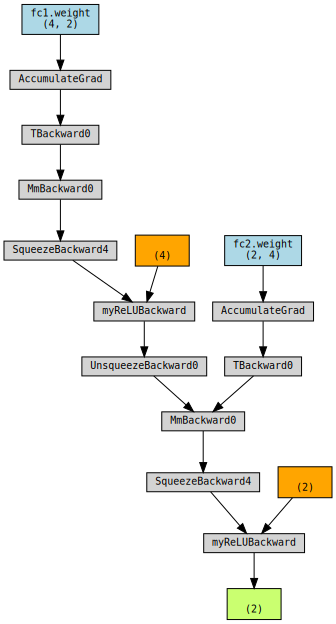

In [ ]:
loss.backward(retain_graph=True)
print(loss.item())

dot = make_dot(out, params=dict(list(model.named_parameters())))
dot.render('computational_graph', format='png')  # PNG形式で保存
dot